# Course: Unsupervised Learning in Python
- [DataCamp course link](https://www.datacamp.com/courses/unsupervised-learning-in-python/)

In [3]:
# Pre-load modules used later
from IPython.display import Image

## Chapter 1: Clustering for dataset exploration
- [Slides](slides/ch1_slides.pdf)


**Unsupervised** tasks find patterns in data *without* a specific prediction task in mind.

**k-means**
- [**`sklearn.cluster.KMeans`**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    - `fit()` -- determines specified number (k) of cluster centroids
    - `predict()` -- finds nearest centroid for each new sample
- (Not to be confused with KNN, which is a *supervised classification* technique)

Model performance metrics:
- **cross-tabulation** is used to cross-check predicted labels with ground truth labels (if they are available!!).
    - With pandas: `pd.crosstab(df['predicted_labels'], df['actual_labels'])`
- **inertia** - measures how spread out the clusters are (*lower* is better).  *Does not require pre-labeled data.*  Mathematically, it's the mean of distances of each sample from its centroid.
    - `model.inertia_`
    

In k-means, feature variance = feature influence, therefore normalization is often needed:
- [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) -- Scales *all* values for a feature.
- `sklearn.preprocessing.Normalizer` -- Scales each value *independently*.
- `sklearn.preprocessing.MaxAbsScaler`


## Chapter 2: Visualization with hierarchical clustering and t-SNE
- [Slides](slides/ch2_slides.pdf)


### Hierarchical clustering
- Groups closest clusters into further clusters
- "agglomerative" and "divisive" methods
- A **dendrogram** is a great viz for hierarchies.  We'll use SciPy for this:
    - **`scipy.cluster.hierarchy.linkage`**
    - **`scipy.cluster.hierarchy.dendrogram`**
        - The y-axis height in the dendrogram corresponds to *cluster distance*
    - **`scipy.cluster.hierarchy.fcluster()`** -- returns NumPy array of cluster labels 
    
## t-SNE
- "t-distributed stochastic neighbor embedding" - Maps samples from a higher dimension into a 2D (or 3D) space, for easier visual interpretation!
- `sklearn.manifold.TSNE`
    - Only has a `.fit_transform()` method (not separate ones)
    - `learning_rate` param is relevant here (usually between 50-200)

## Chapter 3: Decorrelating your data and dimension reduction
- [Slides](slides/ch3_slides.pdf)

# PCA

[**`sklearn.decomposition.PCA`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


Two steps in PCA process:
1. **Decorrelation**
    - Finds principle components/axes, re-aligns data with them, and shifts data samples to a mean of 0 (`model.mean_` attribute).
    - `.fit()` learns the model, `transform()` applies it.
    - Components are stored in `model.components_` attribute.
    - Columns of transformed matrix are the *PCA features*.  PCA features are NOT linearly correlated like dataset features may be.
    - The first principal component of the data is *the direction in which the data varies the most*
1. **Dimension reduction**
    - **intrinsic dimension** -- Number of features/dimensions needed to approximate a data set.  
        - Truly informative PCA features are those with *significant variance*!
        - As a correllary, *low variance* features are considered "noise."
        - Variances are stored in the `pca_model.explained_variance_` attribute.
    - Optionally specify dimensions you want with `PCA(n_components=n)` 


Alternative implementation for sparse arrays such as **`scipy.sparse.csr_matrix`** (like used in tf-idf word count matrices):
- [**`sklearn.decomposition.TruncatedSVD`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) supports `csr_matrix` and behaves like `PCA`.

## Chapter 4: Discovering interpretable features
- [Slides](slides/ch4_slides.pdf)

### NMF - Non-negative Matrix Factorization
[**`sklearn.decomposition.NMF`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)


NMF models are *interpretable* (vs. PCA).  It achieves this by decomposing samples as sums of their parts.
- For example, it expresses documents as "topics" and images as combinations of patterns.  These are the *components*.
- NMF has principle components are just like with PCA.  You *must* however specify `n_components` when instantiating NMF.
- Features are computed by training the model.
- NMF can approximately reproduce the original samples by combining the components & features (the product of their matrices -- **M**atrix **F**actorization!).
- Can only be applied to non-negative data samples.




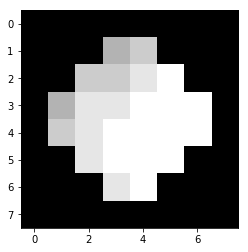

In [4]:
#
# Display grayscale images from matrices using `plt.imshow()`
#
import matplotlib.pyplot as plt

moon_bitmap = [[ 0., 0., 0., 0., 0., 0., 0., 0.],
               [ 0., 0., 0., 0.7, 0.8, 0., 0., 0.],
               [ 0., 0., 0.8, 0.8, 0.9, 1., 0., 0.],
               [ 0., 0.7, 0.9, 0.9, 1., 1., 1., 0.],
               [ 0., 0.8, 0.9, 1., 1., 1., 1., 0.],
               [ 0., 0., 0.9, 1., 1., 1., 0., 0.],
               [ 0., 0., 0., 0.9, 1., 0., 0., 0.],
               [ 0., 0., 0., 0., 0., 0., 0., 0.]]

plt.imshow(moon_bitmap, cmap='gray')
plt.show()

### Recommender systems using NMF

- **Cosine similarity** -- A measure of how similar documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity. ([Reference](https://www.machinelearningplus.com/nlp/cosine-similarity/))

In [8]:
# Cosine similarity example
Image(url="https://www.machinelearningplus.com/wp-content/uploads/2018/10/soft-cosine.png", width=600)